## Data Wrangling and Exploration

In [1]:
import os

In [2]:
path = 'G:\Projects\TelcoCustomerChurn'

In [3]:
files = os.listdir(path)

In [4]:
for file in files:
    print(file)

## Data Wrangling

In [125]:
# Import pandas matplotlib and seaborn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [126]:
#loading data into notebook
telco = pd.read_csv(r"G:\Projects\TelcoCustomerChurn\Telco Main.csv")

In [127]:
telco.shape

(6687, 33)

In [128]:
telco.head()

,Customer ID,Churn,Account_Length,Local_Calls,Local_Mins,Intl_Calls,Intl_Mins,Intl_Active,Intl_Plan,Extra_Internationa_ Charges,...,Payment Method,Monthly Charge,Total Charges,Churn Category,Churn Reason,InternetService,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,4444-BZPU,No,1,3,8.0,0.0,0.0,No,no,0.0,...,Direct Debit,10,10,NaN,NaN,DSL,No,No,No,No
1,5676-PTZX,No,33,179,431.3,0.0,0.0,No,no,0.0,...,Paper Check,21,703,NaN,NaN,DSL,Yes,No,No,No
2,8532-ZEKQ,No,44,82,217.6,0.0,0.0,No,yes,0.0,...,Direct Debit,23,1014,NaN,NaN,DSL,No,No,No,No
3,1314-SMPJ,No,10,47,111.6,60.0,71.0,Yes,yes,0.0,...,Paper Check,17,177,NaN,NaN,DSL,Yes,Yes,No,No
4,2956-TXCJ,No,62,184,621.2,310.0,694.4,Yes,yes,0.0,...,Direct Debit,28,1720,NaN,NaN,Fiber optic,No,No,No,No


In [129]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6687 entries, 0 to 6686
Data columns (total 33 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        6687 non-null   object 
 1   Churn                              6687 non-null   object 
 2   Account_Length                     6687 non-null   int64  
 3   Local_Calls                        6687 non-null   int64  
 4   Local_Mins                         6687 non-null   float64
 5   Intl_Calls                         6687 non-null   float64
 6   Intl_Mins                          6687 non-null   float64
 7   Intl_Active                        6687 non-null   object 
 8   Intl_Plan                          6687 non-null   object 
 9   Extra_Internationa_ Charges        6687 non-null   float64
 10  CustServ_Calls                     6687 non-null   int64  
 11  Avg_Monthly_GB_Download            6687 non-null   int64

In [130]:
telco.dtypes

Customer ID                           object
Churn                                 object
Account_Length                         int64
Local_Calls                            int64
Local_Mins                           float64
Intl_Calls                           float64
Intl_Mins                            float64
Intl_Active                           object
Intl_Plan                             object
Extra_Internationa_ Charges          float64
CustServ_Calls                         int64
Avg_Monthly_GB_Download                int64
Unlimited Data Plan                   object
Extra Data Charges                     int64
State                                 object
Phone Number                          object
Gender                                object
Age                                    int64
Under 30                              object
Senior                                object
Group                                 object
Device Protection & Online Backup     object
Contract T

In [131]:
telco['Churn'].value_counts()

Churn
No     4891
Yes    1796
Name: count, dtype: int64

In [132]:
#create df contains 'Churn' and'CustServ_Calls' columns only
CC = telco[['Churn','CustServ_Calls']]

print(CC)

     Churn  CustServ_Calls
0       No               0
1       No               0
2       No               0
3       No               0
4       No               0
...    ...             ...
6682   Yes               0
6683   Yes               5
6684   Yes               4
6685   Yes               2
6686   Yes               1

[6687 rows x 2 columns]


In [133]:
# Group telco by 'Churn' and compute the mean
print(CC.groupby(['Churn']).mean())

       CustServ_Calls
Churn                
No           0.372112
Yes          2.395880


In [134]:
# Group telco by 'Churn' and compute the standard deviation
print(CC.groupby(['Churn']).std())

       CustServ_Calls
Churn                
No           0.710821
Yes          1.745592


In [135]:
# Count the number of churners and non-churners by CustServ_Calls  
print(telco.groupby('Churn')['CustServ_Calls'].value_counts())

Churn  CustServ_Calls
No     0                 3695
       1                  611
       2                  547
       3                   37
       4                    1
Yes    0                  361
       2                  316
       4                  292
       5                  289
       1                  278
       3                  260
Name: count, dtype: int64


In [136]:
# Count the number of churners and non-churners by State
print(telco.groupby('State')['Churn'].value_counts())

State  Churn
AK     No        74
       Yes       30
AL     No       115
       Yes       46
AR     No        83
               ... 
WI     Yes       39
WV     No       156
       Yes       57
WY     No       116
       Yes       38
Name: count, Length: 102, dtype: int64


In [137]:
#count number of churners and non-churners for CA, CO, and AL
CA_telco = telco[telco['State'].isin(['CA','CO','AL'])]

print(CA_telco.groupby('State')['Churn'].value_counts())

State  Churn
AL     No       115
       Yes       46
CA     Yes       43
       No        25
CO     No       103
       Yes       29
Name: count, dtype: int64


## Data Preparation

In [138]:
#print number of nulls  in dataset
telco.isnull().sum()

Customer ID                             0
Churn                                   0
Account_Length                          0
Local_Calls                             0
Local_Mins                              0
Intl_Calls                              0
Intl_Mins                               0
Intl_Active                             0
Intl_Plan                               0
Extra_Internationa_ Charges             0
CustServ_Calls                          0
Avg_Monthly_GB_Download                 0
Unlimited Data Plan                     0
Extra Data Charges                      0
State                                   0
Phone Number                            0
Gender                                  0
Age                                     0
Under 30                                0
Senior                                  0
Group                                   0
Device Protection & Online Backup       0
Contract Type                           0
Payment Method                    

In [139]:
#replace nulls with N/A in 'Churn Category' and 'Churn Reason'
telco = telco.fillna('N/A')

In [140]:
#check nulls in dataset
telco.isnull().sum()

Customer ID                          0
Churn                                0
Account_Length                       0
Local_Calls                          0
Local_Mins                           0
Intl_Calls                           0
Intl_Mins                            0
Intl_Active                          0
Intl_Plan                            0
Extra_Internationa_ Charges          0
CustServ_Calls                       0
Avg_Monthly_GB_Download              0
Unlimited Data Plan                  0
Extra Data Charges                   0
State                                0
Phone Number                         0
Gender                               0
Age                                  0
Under 30                             0
Senior                               0
Group                                0
Device Protection & Online Backup    0
Contract Type                        0
Payment Method                       0
Monthly Charge                       0
Total Charges            

In [141]:
#print duplicates in dataset 
telco.duplicated().sum()

0

In [142]:
#print unique values in columns
print(telco['Churn'].unique())
print(telco['Intl_Plan'].unique())
print(telco['Unlimited Data Plan'].unique())
print(telco['State'].unique())
print(telco['Gender'].unique())
print(telco['Under 30'].unique())
print(telco['Senior'].unique())
print(telco['Group'].unique())
print(telco['Device Protection & Online Backup'].unique())
print(telco['Contract Type'].unique())
print(telco['Payment Method'].unique())
print(telco['Churn Category'].unique())
print(telco['Churn Reason'].unique())
print(telco['InternetService'].unique())
print(telco['DeviceProtection'].unique())
print(telco['TechSupport'].unique())
print(telco['StreamingTV'].unique())
print(telco['StreamingMovies'].unique())



['No' 'Yes']
['no' 'yes']
['Yes' 'No']
['KS' 'OH' 'MO' 'WV' 'RI' 'IA' 'NY' 'ID' 'VT' 'TX' 'CO' 'SC' 'NE' 'IL'
 'NH' 'LA' 'AZ' 'OK' 'GA' 'MA' 'MD' 'AR' 'WI' 'OR' 'MI' 'WY' 'VA' 'CA'
 'MN' 'SD' 'WA' 'UT' 'NJ' 'NM' 'NV' 'DC' 'IN' 'KY' 'ME' 'MT' 'MS' 'AL'
 'FL' 'AK' 'DE' 'TN' 'NC' 'CT' 'PA' 'ND' 'HI']
['Female' 'Male' 'Prefer not to say']
['No' 'Yes']
['No' 'Yes']
['No' 'Yes']
['No' 'Yes']
['Month-to-Month' 'One Year' 'Two Year']
['Direct Debit' 'Paper Check' 'Credit Card']
['N/A' 'Competitor' 'Other' 'Attitude' 'Dissatisfaction' 'Price']
['N/A' 'Competitor made better offer' 'Moved'
 'Competitor had better devices'
 'Competitor offered higher download speeds' 'Attitude of support person'
 'Network reliability' "Don't know" 'Service dissatisfaction'
 'Product dissatisfaction' 'Poor expertise of online support'
 'Price too high' 'Limited range of services'
 'Lack of affordable download/upload speed' 'Long distance charges'
 'Competitor offered more data' 'Attitude of service provider'
 'Poo

In [143]:
# Replace 'no' with 0 and 'yes' with 1 in 'Churn'
telco['Churn'] = telco['Churn'].replace({'No':0,'Yes':1})

#check values
telco['Churn'].head()

0    0
1    0
2    0
3    0
4    0
Name: Churn, dtype: int64

In [144]:
# Replace 'no' with 0 and 'yes' with 1 in 'Intl_Plan'
telco['Intl_Plan'] = telco['Intl_Plan'].replace({'no':0,'yes':1})

#check values
telco['Intl_Plan'].head()

0    0
1    0
2    1
3    1
4    1
Name: Intl_Plan, dtype: int64

In [145]:
# Replace 'no' with 0 and 'yes' with 1 in 'Unlimited Data Plan'
telco['Unlimited Data Plan'] = telco['Unlimited Data Plan'].replace({'No':0,'Yes':1})

#check values
telco['Unlimited Data Plan'].head()

0    1
1    1
2    1
3    1
4    1
Name: Unlimited Data Plan, dtype: int64

In [146]:
# Replace 'no' with 0 and 'yes' with 1 in 'Under 30'
telco['Under 30'] = telco['Under 30'].replace({'No':0,'Yes':1})

#check values
telco['Under 30'].head()

0    0
1    0
2    0
3    0
4    0
Name: Under 30, dtype: int64

In [147]:
# Replace 'no' with 0 and 'yes' with 1 in 'Senior'
telco['Senior'] = telco['Senior'].replace({'No':0,'Yes':1})

#check values
telco['Senior'].head()

0    0
1    0
2    0
3    0
4    0
Name: Senior, dtype: int64

In [148]:
# Replace 'no' with 0 and 'yes' with 1 in 'Group'
telco['Group'] = telco['Group'].replace({'No':0,'Yes':1})

#check values
telco['Group'].head()

0    0
1    0
2    0
3    0
4    0
Name: Group, dtype: int64

In [149]:
# Replace 'no' with 0 and 'yes' with 1 in 'Device Protection & Online Backup'
telco['Device Protection & Online Backup'] = telco['Device Protection & Online Backup'].replace({'No':0,'Yes':1})

#check values
telco['Device Protection & Online Backup'].head()

0    0
1    1
2    1
3    0
4    0
Name: Device Protection & Online Backup, dtype: int64

In [236]:
# Save the DataFrame to a new CSV file
telco.to_csv('G:\Projects\TelcoCustomerChurn\preprocessed.csv', index=False)

In [150]:
#display summary statistics
telco.describe()

,Churn,Account_Length,Local_Calls,Local_Mins,Intl_Calls,Intl_Mins,Intl_Plan,Extra_Internationa_ Charges,CustServ_Calls,Avg_Monthly_GB_Download,Unlimited Data Plan,Extra Data Charges,Age,Under 30,Senior,Group,Device Protection & Online Backup,Monthly Charge,Total Charges
count,6687.000000,6687.000000,6687.000000,6687.000000,6687.000000,6687.000000,6687.000000,6687.000000,6687.000000,6687.000000,6687.000000,6687.000000,6687.000000,6687.000000,6687.000000,6687.000000,6687.000000,6687.000000,6687.000000
mean,0.268581,32.337820,130.974129,322.752864,51.097524,130.070624,0.097353,33.641783,0.915657,6.696276,0.672050,3.374458,47.448632,0.192463,0.183490,0.227456,0.343054,31.030357,1083.755645
std,0.443254,24.595689,121.893966,288.619931,103.592369,243.527828,0.296460,76.346828,1.411484,7.454339,0.469502,12.565309,16.969893,0.394264,0.387097,0.419221,0.474765,16.288147,1127.074863
min,0.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.000000,0.000000,0.000000,0.000000,0.000000,5.000000,6.000000
25%,0.000000,9.000000,31.000000,76.900000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,33.000000,0.000000,0.000000,0.000000,0.000000,16.000000,181.000000
50%,0.000000,29.000000,98.000000,250.500000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1.000000,0.000000,47.000000,0.000000,0.000000,0.000000,0.000000,31.000000,647.000000
75%,1.000000,55.000000,199.000000,498.050000,52.000000,140.400000,0.000000,16.400000,2.000000,9.000000,1.000000,0.000000,60.000000,0.000000,0.000000,0.000000,1.000000,43.000000,1732.500000
max,1.000000,77.000000,918.000000,1234.200000,1120.000000,1372.500000,1.000000,585.800000,5.000000,43.000000,1.000000,99.000000,85.000000,1.000000,1.000000,1.000000,1.000000,78.000000,5574.000000


## Data Exploration

C:\Users\united\AppData\Local\Temp\ipykernel_17208\1277426326.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(telco['Account_Length'])


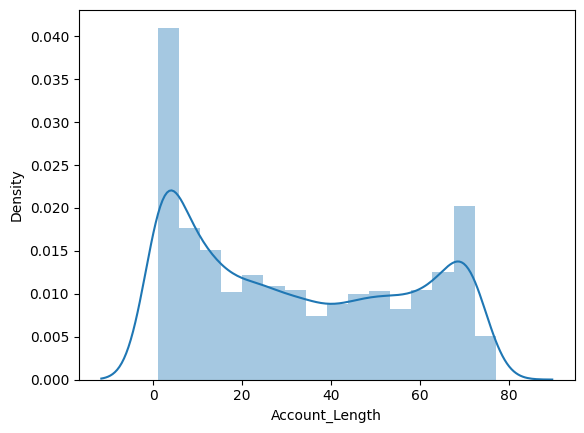

In [78]:
# Visualize the distribution of 'Account_Length'
sns.distplot(telco['Account_Length'])

# Display the plot
plt.show()

C:\Users\united\AppData\Local\Temp\ipykernel_17208\2500426606.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(telco['Local_Calls'])


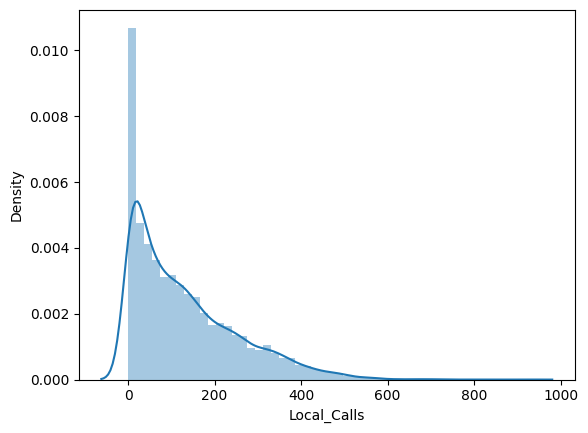

In [79]:
# Visualize the distribution of 'Local_Calls'
sns.distplot(telco['Local_Calls'])

# Display the plot
plt.show()

C:\Users\united\AppData\Local\Temp\ipykernel_17208\403980147.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(telco['Intl_Calls'])


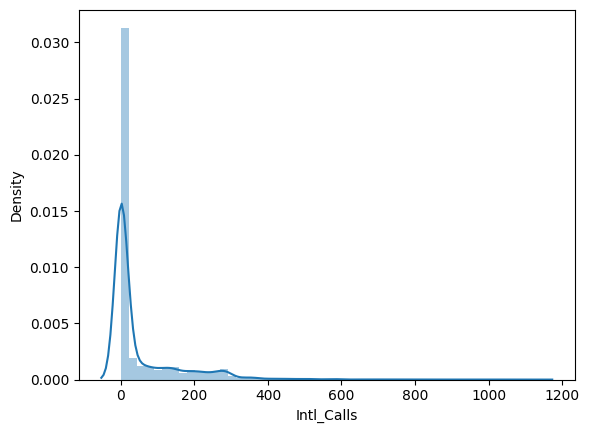

In [80]:
# Visualize the distribution of 'Intl_Calls'
sns.distplot(telco['Intl_Calls'])

# Display the plot
plt.show()

C:\Users\united\AppData\Local\Temp\ipykernel_17208\410217511.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(telco['Age'])


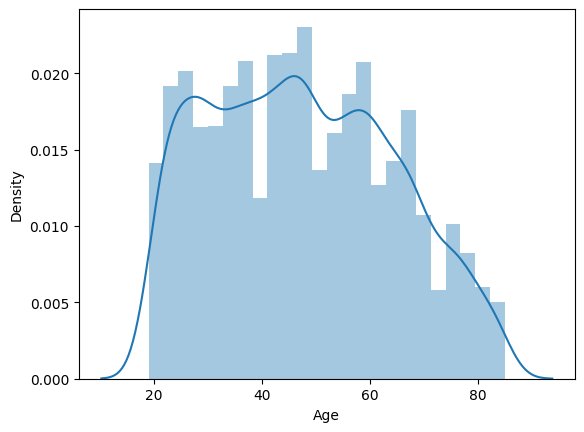

In [82]:
# Visualize the distribution of 'Age'
sns.distplot(telco['Age'])

# Display the plot
plt.show()

C:\Users\united\AppData\Local\Temp\ipykernel_17208\3469426618.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(telco['Total Charges'])


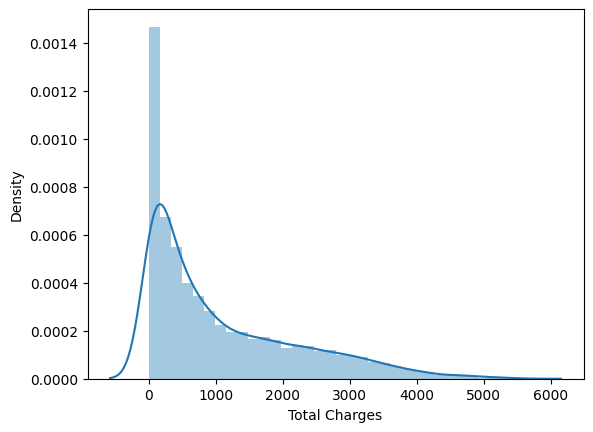

In [83]:
# Visualize the distribution of 'Total Charges'
sns.distplot(telco['Total Charges'])

# Display the plot
plt.show()

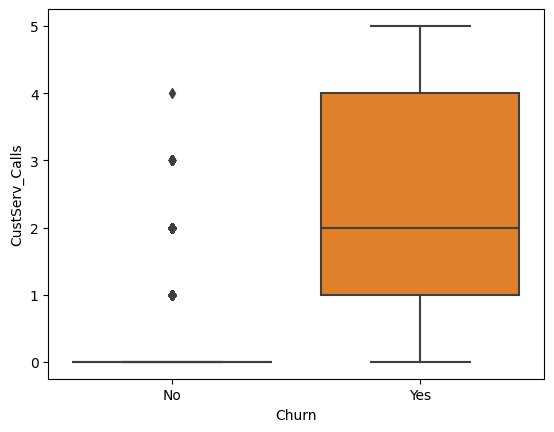

In [100]:
#create boxplot to know if customers who make more customer service calls tend to churn more?
sns.boxplot(x = 'Churn',
            y= 'CustServ_Calls',
            data = telco)

#displat
plt.show()

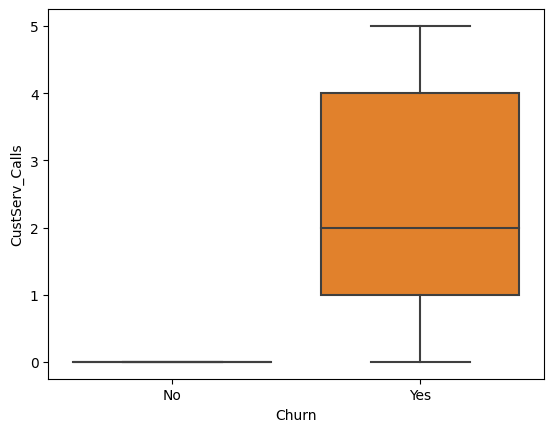

In [101]:
#remove outliers
sns.boxplot(x = 'Churn',
            y= 'CustServ_Calls',
            data = telco
           ,sym="")

#displat
plt.show()

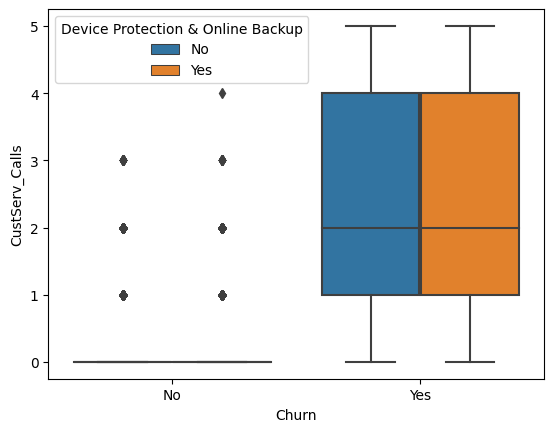

In [104]:
# Add "Device Protection & Online Backup" as a third variable
sns.boxplot(x = 'Churn',
            y = 'CustServ_Calls',
            data = telco,
            hue = "Device Protection & Online Backup")

# Display the plot
plt.show()

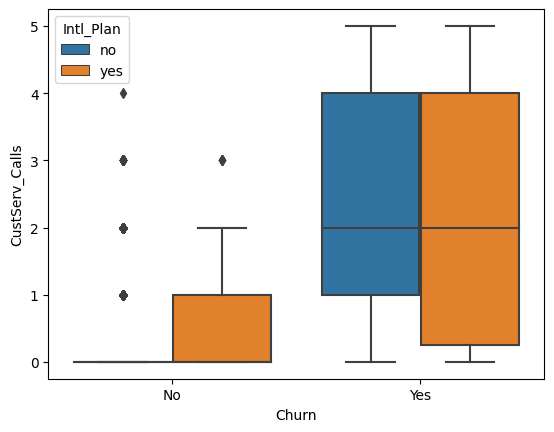

In [105]:
# Add "Intl_Plan" as a third variable
sns.boxplot(x = 'Churn',
            y = 'CustServ_Calls',
            data = telco,
            hue = "Intl_Plan")

# Display the plot
plt.show()

#### Conclusion
It looks like customers who do churn end up leaving more customer service calls, unless these customers also have an international plan, in which case they leave more customer service calls. This type of information is really useful in better understanding the drivers of churn. 

In [22]:
# Perform one hot encoding on 'State'
telco_state = pd.get_dummies(telco['State'])

# Print the head of telco_state
telco_state.head()

,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [151]:
telco.dtypes

Customer ID                           object
Churn                                  int64
Account_Length                         int64
Local_Calls                            int64
Local_Mins                           float64
Intl_Calls                           float64
Intl_Mins                            float64
Intl_Active                           object
Intl_Plan                              int64
Extra_Internationa_ Charges          float64
CustServ_Calls                         int64
Avg_Monthly_GB_Download                int64
Unlimited Data Plan                    int64
Extra Data Charges                     int64
State                                 object
Phone Number                          object
Gender                                object
Age                                    int64
Under 30                               int64
Senior                                 int64
Group                                  int64
Device Protection & Online Backup      int64
Contract T

In [152]:
telco_features= telco[['Account_Length','Local_Calls','Local_Mins','Intl_Calls','Intl_Mins', 'Intl_Plan','CustServ_Calls','Extra_Internationa_ Charges','Avg_Monthly_GB_Download','Unlimited Data Plan','Extra Data Charges','Age','Under 30','Group','Device Protection & Online Backup','Monthly Charge','Total Charges']]

In [153]:
telco_features.head()

,Account_Length,Local_Calls,Local_Mins,Intl_Calls,Intl_Mins,Intl_Plan,CustServ_Calls,Extra_Internationa_ Charges,Avg_Monthly_GB_Download,Unlimited Data Plan,Extra Data Charges,Age,Under 30,Group,Device Protection & Online Backup,Monthly Charge,Total Charges
0,1,3,8.0,0.0,0.0,0,0,0.0,3,1,0,35,0,0,0,10,10
1,33,179,431.3,0.0,0.0,0,0,0.0,3,1,0,49,0,0,1,21,703
2,44,82,217.6,0.0,0.0,1,0,0.0,3,1,0,51,0,0,1,23,1014
3,10,47,111.6,60.0,71.0,1,0,0.0,2,1,0,41,0,0,0,17,177
4,62,184,621.2,310.0,694.4,1,0,0.0,3,1,0,51,0,0,0,28,1720


In [154]:
telco_features.corr()

,Account_Length,Local_Calls,Local_Mins,Intl_Calls,Intl_Mins,Intl_Plan,CustServ_Calls,Extra_Internationa_ Charges,Avg_Monthly_GB_Download,Unlimited Data Plan,Extra Data Charges,Age,Under 30,Group,Device Protection & Online Backup,Monthly Charge,Total Charges
Account_Length,1.000000,0.808959,0.844664,0.352455,0.374393,-0.007239,-0.220730,0.277557,0.050712,0.032948,0.081634,0.008610,0.007345,0.132379,0.361749,0.199586,0.788632
Local_Calls,0.808959,1.000000,0.960020,0.281572,0.294704,-0.005745,-0.181444,0.211008,0.048735,0.033283,0.060669,0.000184,0.012608,0.102100,0.296136,0.173866,0.649775
Local_Mins,0.844664,0.960020,1.000000,0.296339,0.311177,-0.002386,-0.190631,0.223125,0.051573,0.036790,0.058373,-0.002112,0.017717,0.109210,0.312779,0.178922,0.674701
Intl_Calls,0.352455,0.281572,0.296339,1.000000,0.859406,0.191491,-0.048850,0.672970,0.021693,-0.000285,0.057978,0.001109,0.003425,0.045166,0.110860,0.076029,0.278741
Intl_Mins,0.374393,0.294704,0.311177,0.859406,1.000000,0.220103,-0.042113,0.770625,0.026615,0.008932,0.048636,0.005234,0.007318,0.049548,0.126928,0.084365,0.297966
Intl_Plan,-0.007239,-0.005745,-0.002386,0.191491,0.220103,1.000000,-0.009326,-0.144723,-0.027429,-0.008064,-0.017738,0.011087,-0.027247,-0.009717,-0.024789,-0.027126,-0.013127
CustServ_Calls,-0.220730,-0.181444,-0.190631,-0.048850,-0.042113,-0.009326,1.000000,0.010853,0.018177,0.095477,0.015257,0.076648,-0.027266,-0.168016,-0.034710,0.140808,-0.106737
Extra_Internationa_ Charges,0.277557,0.211008,0.223125,0.672970,0.770625,-0.144723,0.010853,1.000000,0.029432,0.009663,0.055537,0.004020,0.021343,0.028564,0.103066,0.078809,0.228761
Avg_Monthly_GB_Download,0.050712,0.048735,0.051573,0.021693,0.026615,-0.027429,0.018177,0.029432,1.000000,0.355855,0.078104,-0.321727,0.439333,0.077629,0.204958,0.293223,0.186505
Unlimited Data Plan,0.032948,0.033283,0.036790,-0.000285,0.008932,-0.008064,0.095477,0.009663,0.355855,1.000000,-0.384468,0.083534,-0.031454,-0.130845,0.294779,0.520333,0.276516


In [155]:
# Drop the unnecessary features
telco = telco.drop(['Intl_Active','Group'], axis = 1)

In [156]:
# Verify dropped features
print(telco.columns)

Index(['Customer ID', 'Churn', 'Account_Length', 'Local_Calls', 'Local_Mins',
       'Intl_Calls', 'Intl_Mins', 'Intl_Plan', 'Extra_Internationa_ Charges',
       'CustServ_Calls', 'Avg_Monthly_GB_Download', 'Unlimited Data Plan',
       'Extra Data Charges', 'State', 'Phone Number', 'Gender', 'Age',
       'Under 30', 'Senior', 'Device Protection & Online Backup',
       'Contract Type', 'Payment Method', 'Monthly Charge', 'Total Charges',
       'Churn Category', 'Churn Reason', 'InternetService', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies'],
      dtype='object')


## Predicting Customer Churn

In [209]:
# Define the new_customer data as a dictionary with lists/arrays for each feature
new_customer = {
    'Account_Length': [20],
    'Local_Calls': [150],
    'Local_Mins': [300.50],
    'Intl_Calls': [5.0],
    'Intl_Mins': [25.75],
    'Intl_Plan': [1],
    'Extra_Internationa_ Charges': [10.50],
    'CustServ_Calls': [5],
    'Avg_Monthly_GB_Download': [8],
    'Unlimited Data Plan': [0],
    'Extra Data Charges': [80],
    'Age': [60],
    'Under 30': [0],
    'Senior': [1],
    'Device Protection & Online Backup': [0],
    'Monthly Charge': [100],
    'Total Charges': [1200]
}


# Convert the new_customer data into a DataFrame
new_customer_df = pd.DataFrame(new_customer)






In [210]:
features = ['Account_Length', 'Local_Calls', 'Local_Mins', 'Intl_Calls', 'Intl_Mins', 'Intl_Plan', 'Extra_Internationa_ Charges', 'CustServ_Calls', 'Avg_Monthly_GB_Download', 'Unlimited Data Plan', 'Extra Data Charges','Age', 'Under 30', 'Senior', 'Device Protection & Online Backup', 'Monthly Charge', 'Total Charges']

In [213]:
# Import Support Vector Classification
from sklearn.svm import SVC

# Instantiate the classifier
svc = SVC()

# Fit the classifier
svc.fit(telco[features], telco['Churn'])

# Predict the label of new_customer
print(svc.predict(new_customer_df))

[0]


In [212]:
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

# Instantiate the classifier
clf = LogisticRegression()

# Fit the classifier
clf.fit(telco[features], telco['Churn'])

# Predict the label of new_customer
print(clf.predict(new_customer_df))

[1]


C:\Users\united\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [214]:
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Instantiate the classifier
clf = DecisionTreeClassifier()

# Fit the classifier
clf.fit(telco[features],telco['Churn'])

# Predict the label of new_customer
print(clf.predict(new_customer_df))

[1]


# Accuracy Metrics
1. Score: to compute accuracy for test results(prediction) 
2. Confusion Matrix, Precision, Sensitivity(recall): to compute accuracy using confusion matrix
3. ROC & AUC


#### Accuracy on 70% data for training and 30% data for testing

In [215]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Create feature variable
X = telco[features]

# Create target variable
y = telco['Churn']

# Create training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [216]:
# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Instantiate the classifier
clf = RandomForestClassifier()

# Fit to the training data
clf.fit(X_train,y_train)

# Compute accuracy
print(clf.score(X_test, y_test))

0.8799202790234181


In [217]:
# Import confusion_matrix
from sklearn.metrics import confusion_matrix

# Print the confusion matrix
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))



[[1408   65]
 [ 176  358]]


In [218]:
TP,TN, FP, FN = 358,1408, 65,176  

In [219]:
precision = TP / (TP + FP)
print(precision)

0.8463356973995272


In [220]:
#or
from sklearn.metrics import precision_score
print(precision_score(y_test, y_pred))

0.8463356973995272


In [221]:
sensitivity = TP / (TP + FN)
print(sensitivity)

0.6704119850187266


In [222]:
#or
from sklearn.metrics import recall_score
print(recall_score(y_test, y_pred))

0.6704119850187266


#### Accuracy on 80% data for training and 20% data for testing

In [223]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Create feature variable
X = telco[features]

# Create target variable
y = telco['Churn']

# Create training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [224]:
# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Instantiate the classifier
clf = RandomForestClassifier()

# Fit to the training data
clf.fit(X_train,y_train)

# Compute accuracy
print(clf.score(X_test, y_test))

0.905829596412556


In [225]:
# Import confusion_matrix
from sklearn.metrics import confusion_matrix

# Print the confusion matrix
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))



[[966  24]
 [102 246]]


In [226]:
TP,TN, FP, FN = 246,966  , 24,102 

In [227]:
precision = TP / (TP + FP)
print(precision)

0.9111111111111111


In [228]:
#or
from sklearn.metrics import precision_score
print(precision_score(y_test, y_pred))

0.9111111111111111


In [229]:
sensitivity = TP / (TP + FN)
print(sensitivity)

0.7068965517241379


In [230]:
#or
from sklearn.metrics import recall_score
print(recall_score(y_test, y_pred))

0.7068965517241379


### Conclusion
When adding more data to train model it gets more precise, so the precision for 80% training data is higher than the precision for 70% training data

# ROC & AUC

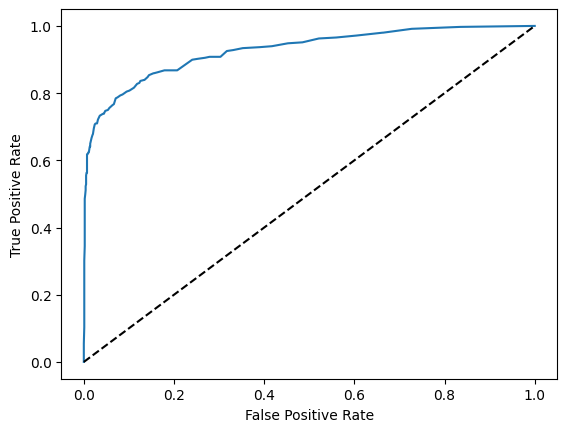

In [231]:
# Import roc_curve
from sklearn.metrics import roc_curve

# Generate the probabilities
y_pred_prob = clf.predict_proba(X_test)[:, 1]

# Import roc_curve
from sklearn.metrics import roc_curve

# Calculate the roc metrics
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot the ROC curve
plt.plot(fpr,tpr)

# Add labels and diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot([0, 1], [0, 1], "k--")
plt.show()

In [232]:
# Import roc_auc_score
from sklearn.metrics import roc_auc_score

# Print the AUC
print(roc_auc_score(y_test, y_pred_prob))

0.9273583536514572


## F1 Score
The advantage of the F1 score is it incorporates both precision and recall into a single metric, and a high F1 score is a sign of a well-performing model.

In [233]:
# Import f1_score
from sklearn.metrics import f1_score

# Print the F1 score
print(f1_score(y_test, y_pred))

0.7961165048543689


## Conclusion


An accuracy of 0.95, precision of 0.91, recall of 0.70, ROC AUC of 0.92, and F1 score of 0.79 indicate a well-performing model overall, but there are some important aspects to consider:

Accuracy (0.95): An accuracy of 0.95 means that 95% of the instances are correctly predicted by the model. In many cases, this is considered a high accuracy, but it's essential to verify if the dataset is balanced or imbalanced. High accuracy might be misleading if the dataset is heavily imbalanced.

Precision (0.91): Precision of 0.91 indicates that when the model predicts a positive instance, it is correct 91% of the time. This is a good precision score and suggests that the model is making relatively accurate positive predictions.

Recall (0.70): Recall of 0.70 means that the model is correctly identifying 70% of the positive instances from the total actual positive instances. While it is not as high as precision, it is still a reasonable recall score.

ROC AUC (0.92): An ROC AUC of 0.92 suggests that the model has good discrimination power and can distinguish between positive and negative instances effectively.

F1 Score (0.79): The F1 score takes into account both precision and recall and provides a balanced evaluation metric. A score of 0.79 indicates a reasonable balance between precision and recall.


In summary, the model seems to be performing well overall, but the significance of the scores depends on the problem's context and the relative importance of precision and recall in the specific application.